In [229]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pymc3 as pm

In [230]:
df = pd.read_csv('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/booking.csv')

In [231]:
df.head(3)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled


In [232]:
df.rename(columns={'Booking_ID':'Booking_ID','number of adults':'number_of_adults', 'number of children':'number_of_children',
                   'number of weekend nights':'number_of_weekend_nights', 'number of week nights':'number_of_week_nights',
                   'type of meal':'type_of_meal','car parking space':'car_parking_space', 'room type':'room_type',
                   'lead time':'lead_time', 'market segment type':'market_segment_type','number of adults':'number_of_adults', 'average price':'average_price','special requests':'special_requests', 
                  'date of reservation':'date_of_reservation','booking status':'booking_status'}, inplace=True)

In [233]:
df.head(3)

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled


In [234]:
df.tail(3)

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
36284,INN36286,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [235]:
df.describe

<bound method NDFrame.describe of       Booking_ID  number_of_adults  number_of_children  \
0       INN00001                 1                   1   
1       INN00002                 1                   0   
2       INN00003                 2                   1   
3       INN00004                 1                   0   
4       INN00005                 1                   0   
...          ...               ...                 ...   
36280   INN36282                 2                   0   
36281   INN36283                 2                   0   
36282   INN36284                 2                   0   
36283   INN36285                 3                   0   
36284   INN36286                 2                   0   

       number_of_weekend_nights  number_of_week_nights  type_of_meal  \
0                             2                      5   Meal Plan 1   
1                             1                      3  Not Selected   
2                             1                      

In [236]:
df.shape

(36285, 17)

In [237]:
df.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

In [238]:
df.isna().sum()

Booking_ID                  0
number_of_adults            0
number_of_children          0
number_of_weekend_nights    0
number_of_week_nights       0
type_of_meal                0
car_parking_space           0
room_type                   0
lead_time                   0
market_segment_type         0
repeated                    0
P-C                         0
P-not-C                     0
average_price               0
special_requests            0
date_of_reservation         0
booking_status              0
dtype: int64

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number_of_adults          36285 non-null  int64  
 2   number_of_children        36285 non-null  int64  
 3   number_of_weekend_nights  36285 non-null  int64  
 4   number_of_week_nights     36285 non-null  int64  
 5   type_of_meal              36285 non-null  object 
 6   car_parking_space         36285 non-null  int64  
 7   room_type                 36285 non-null  object 
 8   lead_time                 36285 non-null  int64  
 9   market_segment_type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average_price             36285 non-null  float64
 14  specia

In [240]:
df['booking_status'].value_counts()
print(df['booking_status'].value_counts())

Not_Canceled    24396
Canceled        11889
Name: booking_status, dtype: int64


In [241]:
df = df.drop(['Booking_ID', 'date_of_reservation'], axis=1)

In [242]:
df

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,booking_status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,Canceled
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,Not_Canceled
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,Not_Canceled
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,Not_Canceled


In [243]:
df = pd.get_dummies(df, columns=['type_of_meal', 'room_type', 'market_segment_type'])

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number_of_adults                   36285 non-null  int64  
 1   number_of_children                 36285 non-null  int64  
 2   number_of_weekend_nights           36285 non-null  int64  
 3   number_of_week_nights              36285 non-null  int64  
 4   car_parking_space                  36285 non-null  int64  
 5   lead_time                          36285 non-null  int64  
 6   repeated                           36285 non-null  int64  
 7   P-C                                36285 non-null  int64  
 8   P-not-C                            36285 non-null  int64  
 9   average_price                      36285 non-null  float64
 10  special_requests                   36285 non-null  int64  
 11  booking_status                     36285 non-null  obj

In [245]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [246]:
X_num = X_train.select_dtypes(include = ['int64', 'float64', 'datetime'])

<Figure size 640x480 with 0 Axes>

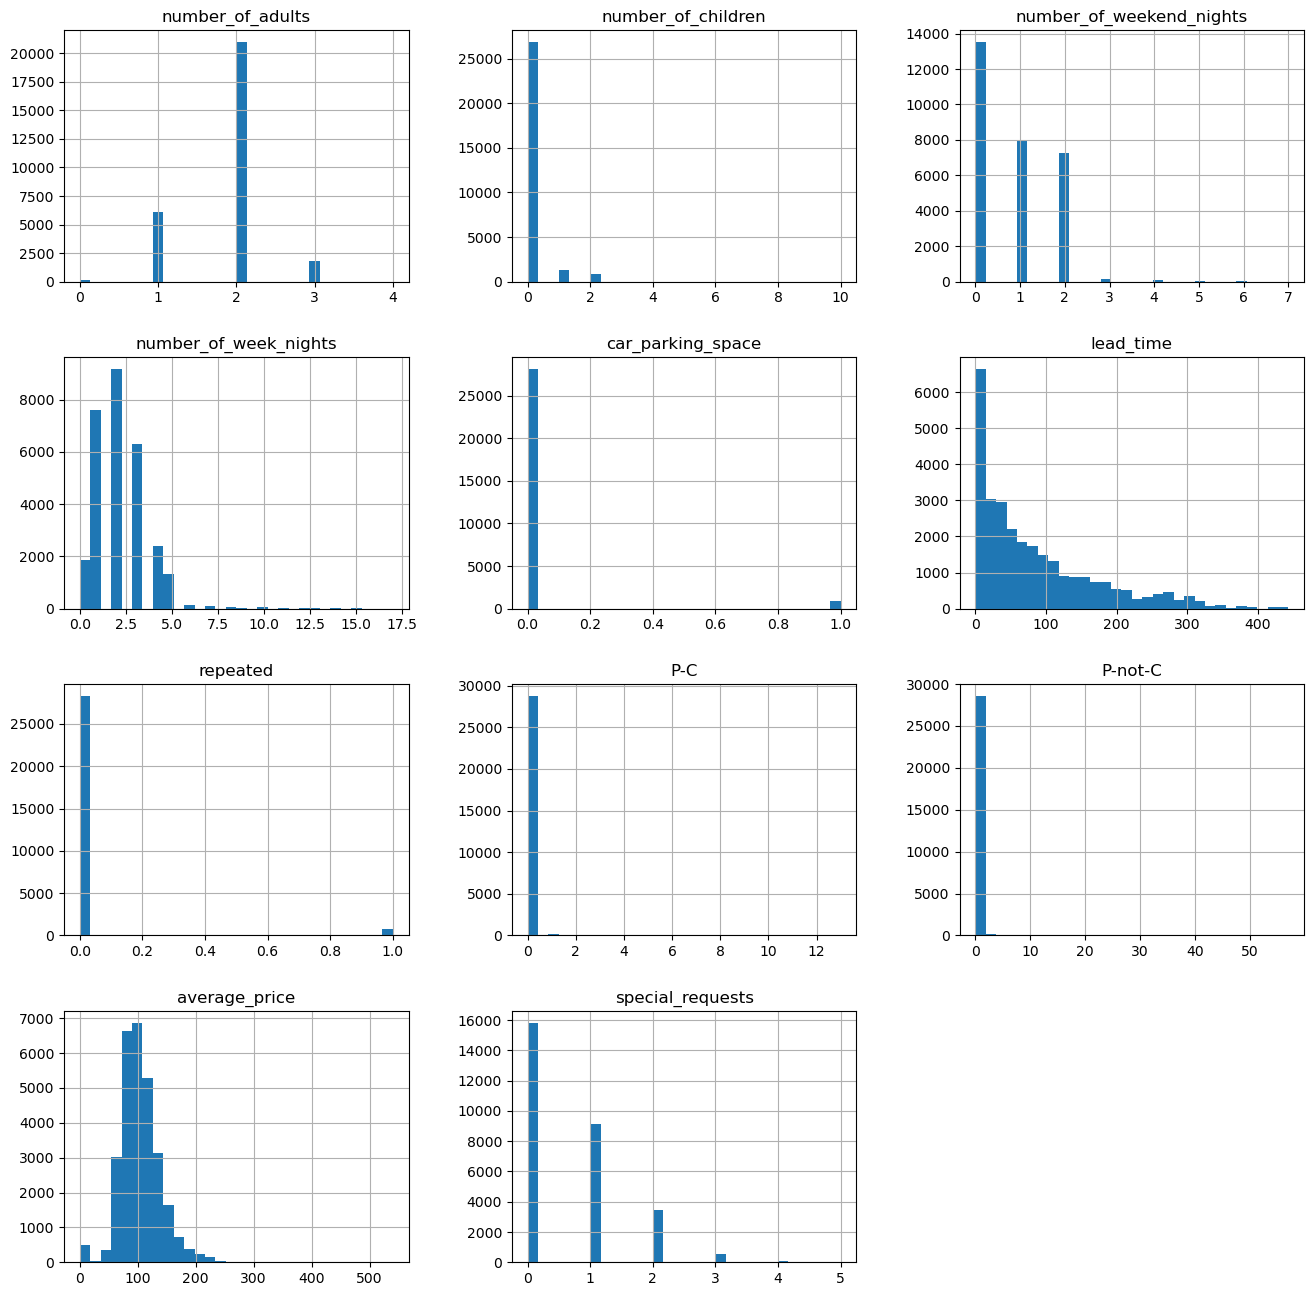

In [247]:
plt.savefig('histogram.png')
X_num.hist(bins = 30, figsize = (16, 16));

<Figure size 640x480 with 0 Axes>

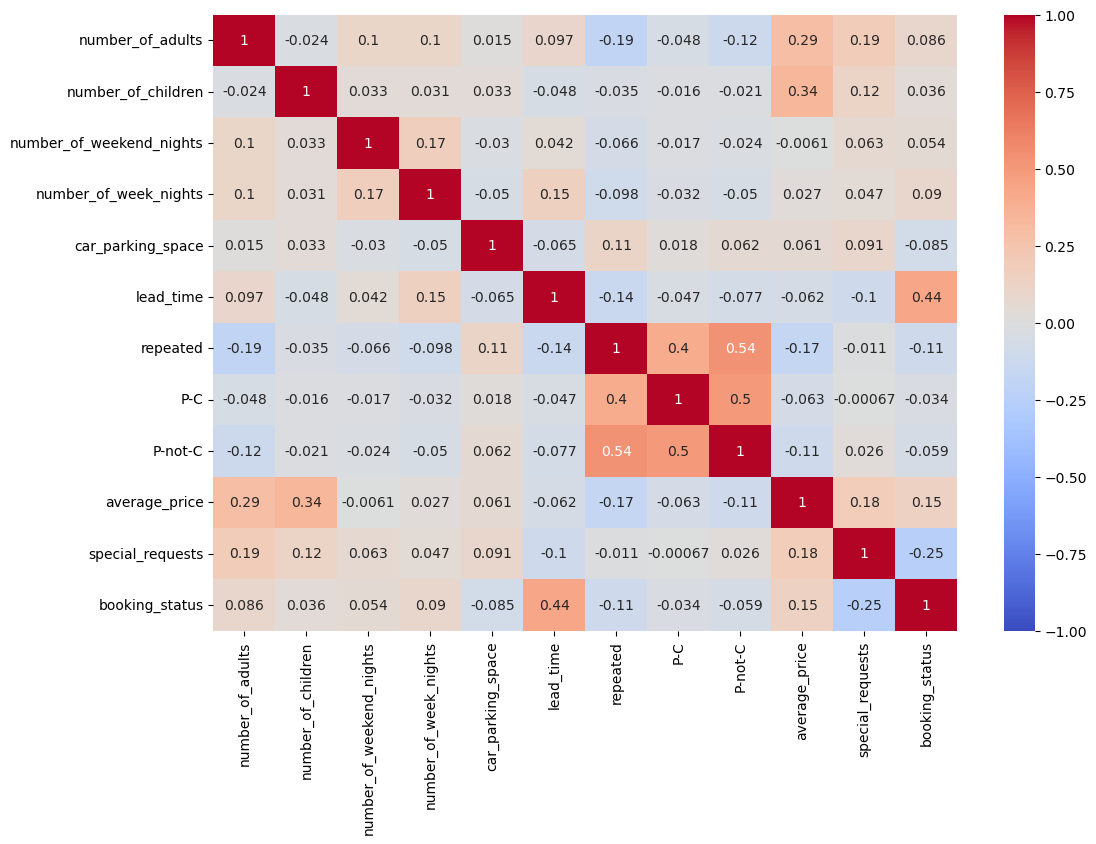

In [248]:
corr = pd.concat([X_num, (y_train == 'Canceled')], axis = 1).corr()
plt.savefig('correlation.png')
plt.figure(figsize = (12, 8))
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True);

In [249]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [250]:
train_data.shape

(29028, 28)

In [251]:
test_data.shape

(7257, 28)

<AxesSubplot:xlabel='booking_status', ylabel='count'>

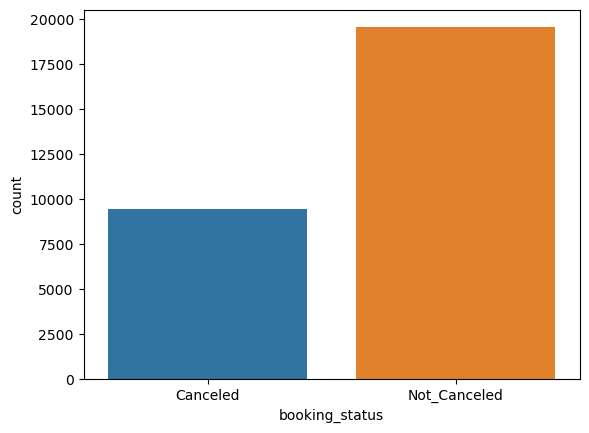

In [252]:
sns.countplot(x = y_train)

<AxesSubplot:xlabel='booking_status', ylabel='count'>

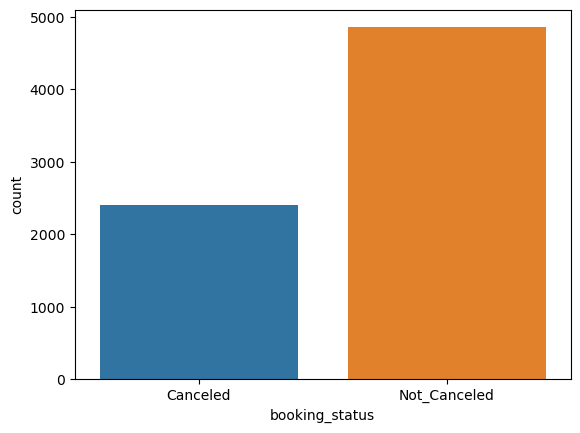

In [253]:
sns.countplot(x = y_test)

In [254]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [255]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

lead_time                            0.414248
average_price                        0.239500
special_requests                     0.112877
number_of_week_nights                0.063861
number_of_weekend_nights             0.042272
number_of_adults                     0.026894
market_segment_type_Online           0.023031
market_segment_type_Offline          0.015839
number_of_children                   0.007738
car_parking_space                    0.007554
type_of_meal_Meal Plan 2             0.006926
room_type_Room_Type 1                0.006305
type_of_meal_Meal Plan 1             0.006017
room_type_Room_Type 4                0.005557
market_segment_type_Corporate        0.004752
type_of_meal_Not Selected            0.004747
repeated                             0.002557
P-not-C                              0.002042
room_type_Room_Type 2                0.001917
room_type_Room_Type 5                0.001731
room_type_Room_Type 6                0.001656
market_segment_type_Complementary 

In [256]:
print(df.columns)

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'P-C', 'P-not-C', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'room_type_Room_Type 1', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


In [257]:
selected_columns_1 = ['lead_time', 'number_of_adults',
                     'number_of_children', 'number_of_weekend_nights',
                     'number_of_week_nights', 'special_requests',
                     'average_price', 'booking_status']
selected_df = df[selected_columns_1]

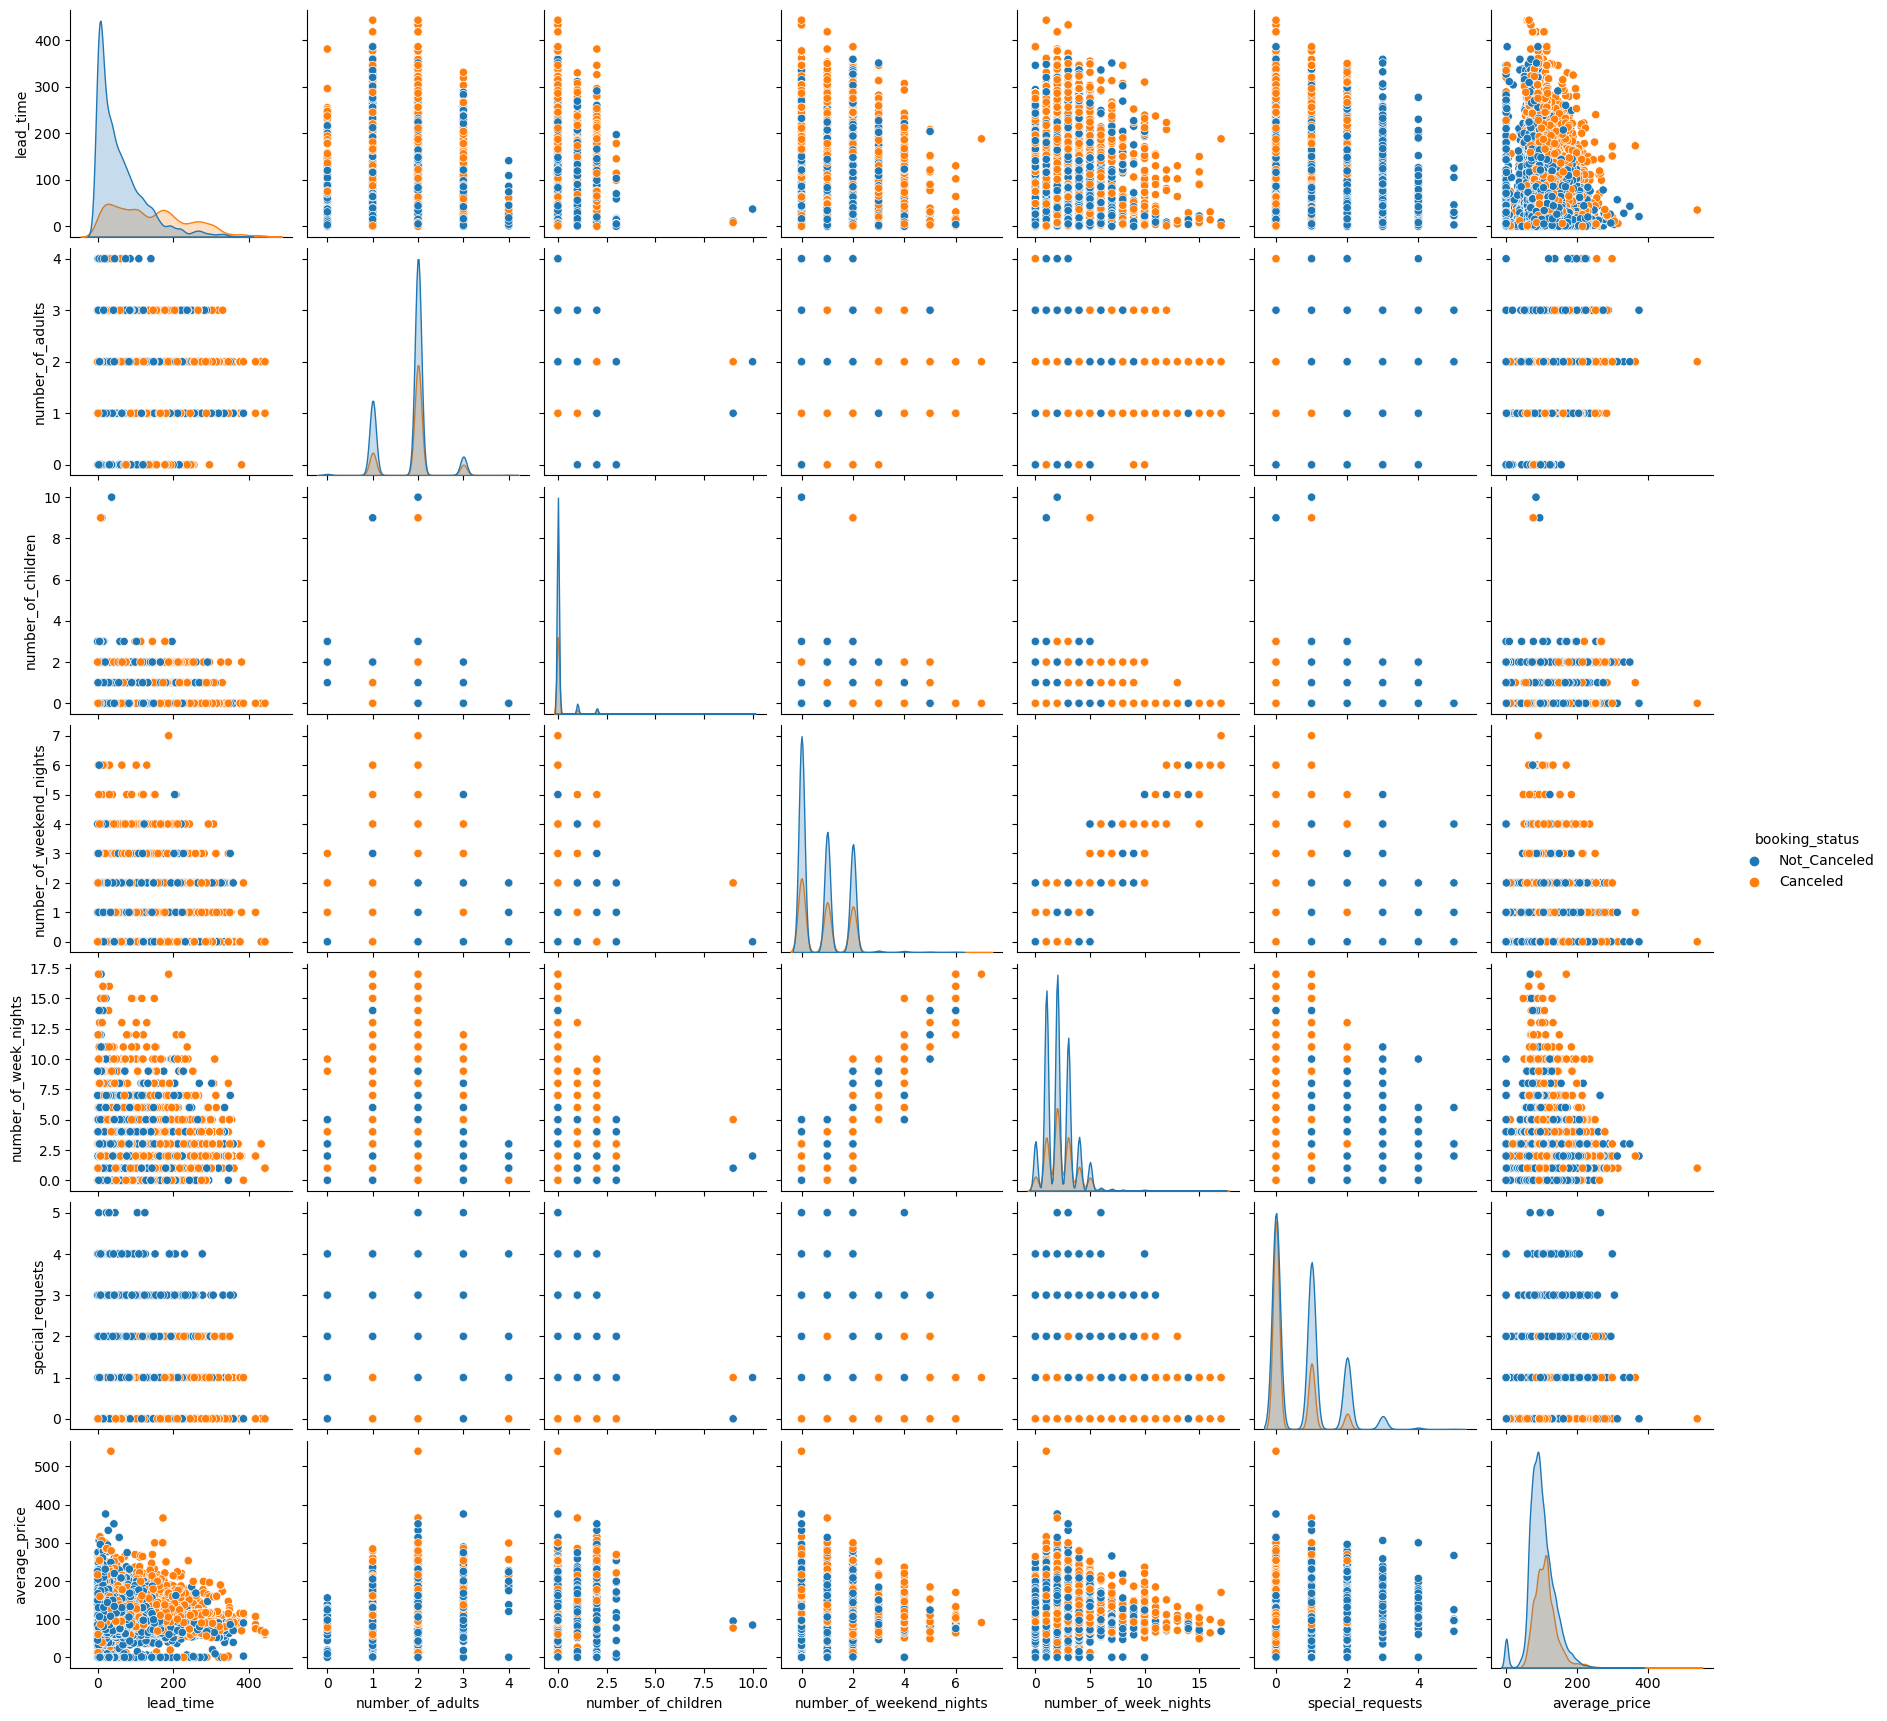

In [258]:
# Example: Pairplot for selected variables
sns.pairplot(selected_df, hue='booking_status', diag_kind='kde')
plt.savefig('tft.png')
plt.show()


Focused on: Predictive Booking Model: Implement a Bayesian model that predicts the likelihood of a successful booking based on variables such as lead time, number of adults and children, weekend and week nights, room type, and special requests. Use historical data to train the model and continuously update it to enhance accuracy.

GLM Implement 

In [169]:
with pm.Model() as bayesian_model:
    pm.glm.GLM.from_formula('booking_status ~ lead_time + number_of_adults + number_of_children + number_of_weekend_nights + number_of_week_nights + special_requests + average_price', df)
    trace = pm.sample(5, tune=5)

# Check the summary of the Bayesian model  #average_price is also important. so need to add next training.
print(pm.summary(trace))


The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 5 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, average_price, special_requests, 

Sampling 4 chains for 5 tune and 5 draw iterations (20 + 20 draws total) took 62 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only divergi

                           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept                -0.098  0.449  -0.810    0.372      0.102    0.073   
lead_time                 0.256  0.673  -0.473    0.978      0.153    0.110   
number_of_adults          0.032  0.170  -0.192    0.258      0.039    0.028   
number_of_children        0.393  0.420  -0.286    0.805      0.096    0.069   
number_of_weekend_nights -0.639  0.324  -0.977   -0.184      0.074    0.053   
number_of_week_nights     0.273  0.382  -0.301    0.743      0.087    0.063   
special_requests         -0.181  0.267  -0.405    0.263      0.061    0.044   
average_price             0.095  0.488  -0.530    0.570      0.111    0.080   
sd                        1.112  0.567   0.567    1.872      0.129    0.093   

                          ess_bulk  ess_tail  r_hat  
Intercept                     19.0      16.0    inf  
lead_time                     19.0      16.0    inf  
number_of_adults              19.0      16.0   

C:\Users\Jishan\anaconda3\lib\site-packages\arviz\stats\diagnostics.py:586: RuntimeWarning: divide by zero encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\stats\diagnostics.py:586: RuntimeWarning: divide by zero encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\stats\diagnostics.py:586: RuntimeWarning: divide by zero encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\stats\diagnostics.py:586: RuntimeWarning: divide by zero encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\stats\diagnostics.py:586: RuntimeWarning: divide by zero encou

In [171]:
test_X = test_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
test_y = test_data['booking_status']

In [172]:
# Assuming you have the trained model from the previous step
with bayesian_model:
    post_pred = pm.sample_posterior_predictive(trace, samples=50)

In [182]:
from sklearn.metrics import accuracy_score, classification_report

predicted_labels = (post_pred['y'].mean(axis=0) > 0.5).astype(int)

accuracy = accuracy_score(test_y, predicted_labels)
print(f'Accuracy on test set: {accuracy}')

print(classification_report(test_y, predicted_labels))

ValueError: Found input variables with inconsistent numbers of samples: [7257, 36285]

In [184]:
with bayesian_model:
    
    post_pred = pm.sample_posterior_predictive(trace, samples=50)

test_post_pred = post_pred['y'][len(df) - len(test_data):]

predicted_labels = (test_post_pred.mean(axis=0) > 0.5).astype(int)

accuracy = accuracy_score(test_y, predicted_labels)
print(f'Accuracy on test set: {accuracy}')

print(classification_report(test_y, predicted_labels))


C:\Users\Jishan\AppData\Local\Temp\ipykernel_22840\1744063561.py:12: RuntimeWarning: Mean of empty slice.
  predicted_labels = (test_post_pred.mean(axis=0) > 0.5).astype(int)


ValueError: Found input variables with inconsistent numbers of samples: [7257, 36285]

In [94]:
iteration = 0  # Change this to the desired iteration
lead_time_values = trace['lead_time'][iteration]
print("Lead time values:", lead_time_values)


print("Length of y_test:", len(y_test))
print("Shape of lead_time_values:", lead_time_values.shape)


print("Values in lead_time_values:", lead_time_values)


condition_result = lead_time_values < 0.01
print("Shape of condition_result:", condition_result.shape)


accuracy = accuracy_score(y_test, condition_result.astype(int))
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
# print(classification_report(y_test, condition_result.astype(int)))


Lead time values: -0.30433397627705383
Length of y_test: 10886
Shape of lead_time_values: ()
Values in lead_time_values: -0.30433397627705383
Shape of condition_result: ()


TypeError: Singleton array 1 cannot be considered a valid collection.

In [185]:
X_test.shape

(7257, 27)

In [186]:
y_train.shape

(29028,)

In [187]:
y_test.shape

(7257,)

In [188]:
# List all variable names in the trace
print(trace.varnames)


['Intercept', 'lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price', 'sd_log__', 'sd']


Binomial-Beta Model

C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 5 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
C:\Users\Jishan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3133: RuntimeWarning: overflow encountered in expm1
  return np.expm1(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 5 tune and 5 draw iterations (10 + 10 draws total) took 41 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release

    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.441  0.158   0.291    0.591      0.059    0.043       7.0       7.0   

   r_hat  
p    inf  


<AxesSubplot:title={'center':'p'}>

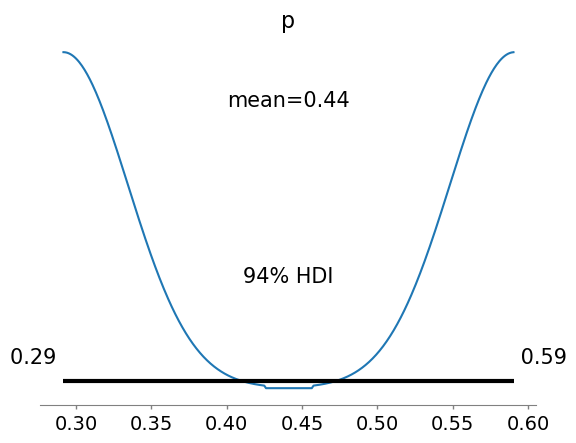

In [189]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the probability parameter (Beta distribution)
    p = pm.Beta('p', alpha=2, beta=2)
    
    # Likelihood (Binomial distribution)
    likelihood = pm.Binomial('likelihood', n=len(df['booking_status']), p=p, observed=df['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(5, tune=5, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['p'])


C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 5 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
C:\Users\Jishan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3133: RuntimeWarning: overflow encountered in expm1
  return np.expm1(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 5 tune and 5 draw iterations (10 + 10 draws total) took 8 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release.

    mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
p  0.603  0.13    0.48    0.727      0.048    0.036       7.0       7.0    inf
Probability that 'p' is greater than 0.5: 50.00%


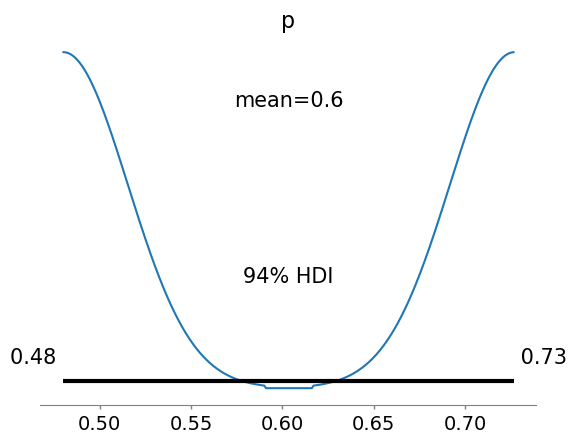

In [190]:
import pymc3 as pm
import pandas as pd
import arviz as az
from scipy.stats import percentileofscore

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the probability parameter (Beta distribution)
    p = pm.Beta('p', alpha=2, beta=2)
    
    # Likelihood (Binomial distribution)
    likelihood = pm.Binomial('likelihood', n=len(df['booking_status']), p=p, observed=df['booking_status'])
    

    trace = pm.sample(5, tune=5, cores=1)  # Adjust the number of samples and tuning steps as needed


print(pm.summary(trace))


az.plot_posterior(trace, var_names=['p'])

# Hypothesis testing

threshold = 0.5
posterior_prob_greater_than_threshold = percentileofscore(trace['p'], threshold)
print(f"Probability that 'p' is greater than {threshold}: {100 - posterior_prob_greater_than_threshold:.2f}%")


Negative-Binomial-Beta Model

C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 5 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
C:\Users\Jishan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3133: RuntimeWarning: overflow encountered in expm1
  return np.expm1(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3061: RuntimeWarning: overflow encountered in exp
  return np.exp(x)


Sampling 2 chains for 5 tune and 5 draw iterations (10 + 10 draws total) took 26 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


    mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
p  0.032  0.02   0.008    0.077      0.008    0.006       7.0       7.0   2.32


C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'p'}>

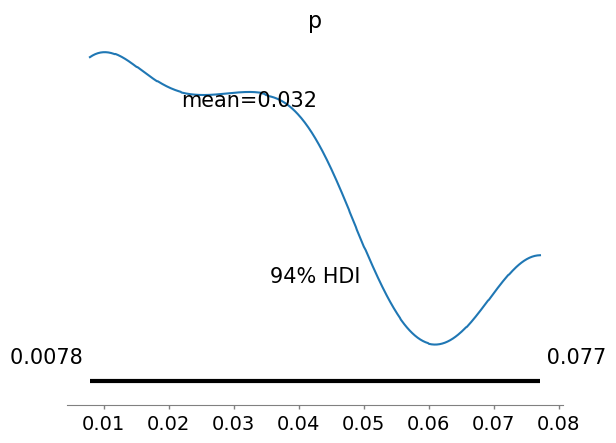

In [191]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the probability parameter (Beta distribution)
    p = pm.Beta('p', alpha=2, beta=2)
    

    likelihood = pm.NegativeBinomial('likelihood', mu=p, alpha=2, observed=df['booking_status'])
    

    trace = pm.sample(5, tune=5, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['p'])


In [197]:
import pymc3 as pm
import arviz as az
import numpy as np

# Assuming you already have the trained model (bayesian_model) and trace from the training phase

# Assuming test_df is your testing DataFrame
# Encode 'booking_status' into binary format
test_data['booking_status'] = (test_data['booking_status'] == 'Canceled').astype(int)

# Make predictions on the test data using the trained model
with bayesian_model:
    # Get the original random variable
    p_original = bayesian_model['p']

    # Replace the original random variable with a Deterministic distribution based on the posterior samples
    p_posterior = pm.Deterministic('p_posterior', np.asarray(trace['p'].mean(axis=0), order='C'))

    # Negative Binomial likelihood for the test data
    test_likelihood = pm.NegativeBinomial('test_likelihood', mu=p_posterior, alpha=2, observed=test_data['booking_status'])

    # Sample from the posterior distribution for the test likelihood
    test_trace = pm.sample_posterior_predictive(trace, samples=5)


# Plot posterior predictive checks
az.plot_ppc(az.from_pymc3(trace, posterior_predictive=test_trace), figsize=(12, 6), mean=False)


ValueError: order must be one of 'C', 'F', 'A', or 'K' (got 'p_posterior')

Poisson-Gamma Model 

C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 5 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rate]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 5 tune and 5 draw iterations (10 + 10 draws total) took 9 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rate  1.101  0.414   0.585     1.79      0.154    0.114       7.0       7.0   

      r_hat  
rate    3.0  


C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'rate'}>

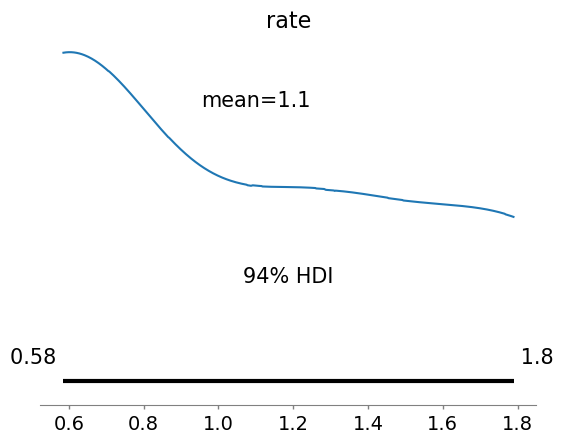

In [198]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the rate parameter (Gamma distribution)
    rate = pm.Gamma('rate', alpha=2, beta=2)
    
    # Poisson likelihood
    likelihood = pm.Poisson('likelihood', mu=rate, observed=df['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(5, tune=5, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['rate'])


In [202]:
import pymc3 as pm
import arviz as az
import numpy as np


test_data['booking_status'] = (test_data['booking_status'] == 'Canceled').astype(int)

# Make predictions on the test data using the trained model
with bayesian_model:
    # Get the original random variable
    rate_original = bayesian_model['rate']

    # Replace the original random variable with a Deterministic distribution based on the posterior samples
    rate_posterior = pm.Deterministic('rate_posterior', np.asarray(trace['rate'].mean(axis=0), order='C'))

    # Poisson likelihood for the test data
    test_likelihood = pm.Poisson('test_likelihood', mu=rate_posterior, observed=test_data['booking_status'])

    # Sample from the posterior distribution for the test likelihood
    test_trace = pm.sample_posterior_predictive(trace, samples=500)



# Plot posterior predictive checks
az.plot_ppc(az.from_pymc3(trace, posterior_predictive=test_trace), figsize=(12, 6), mean=False)


ValueError: order must be one of 'C', 'F', 'A', or 'K' (got 'rate_posterior')

Exponential-Gamma Model

C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 5 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rate]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: overflow encountered in exp
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:1813: RuntimeWarning: invalid value encountered in double_scalars
  return sum(inputs)


Sampling 2 chains for 5 tune and 5 draw iterations (10 + 10 draws total) took 0 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4, but should be close to 0.8. Try to increase the number of tuning steps.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 w

         mean       sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
rate  179.863  171.346  11.461    422.5     63.747   47.033       7.0   

      ess_tail  r_hat  
rate       7.0   2.11  


<AxesSubplot:title={'center':'rate'}>

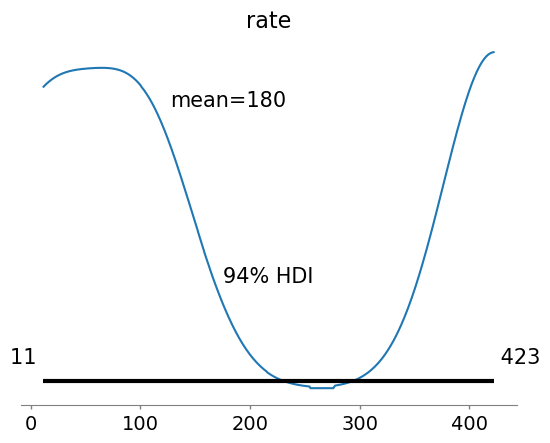

In [203]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the rate parameter (Gamma distribution)
    rate = pm.Gamma('rate', alpha=2, beta=2)
    
    # Exponential likelihood
    likelihood = pm.Exponential('likelihood', lam=rate, observed=df['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(5, tune=5, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['rate'])


In [205]:
import pymc3 as pm
import arviz as az
import numpy as np

test_data['booking_status'] = (test_data['booking_status'] == 'Canceled').astype(int)

# Make predictions on the test data using the trained model
with bayesian_model:
    # Get the original random variable
    rate_original = bayesian_model['rate']

    # Replace the original random variable with a Deterministic distribution based on the posterior samples
    rate_posterior = pm.Deterministic('rate_posterior', np.asarray(trace['rate'].mean(axis=0), order='C'))

    # Exponential likelihood for the test data
    test_likelihood = pm.Exponential('test_likelihood', lam=rate_posterior, observed=test_data['booking_status'])

    # Sample from the posterior distribution for the test likelihood
    test_trace = pm.sample_posterior_predictive(trace, samples=5)


az.plot_ppc(az.from_pymc3(trace, posterior_predictive=test_trace), figsize=(12, 6), mean=False)


ValueError: order must be one of 'C', 'F', 'A', or 'K' (got 'rate_posterior')

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'P-C', 'P-not-C', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'room_type_Room_Type 1', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

Part-2 --- After that, Customer Satisfaction Analysis: Apply Bayesian analytics to assess customer satisfaction by analyzing feedback and preferences. Use variables like type of meal, car parking space availability, and room type to identify patterns that contribute to positive experiences. Implement strategies to enhance customer satisfaction and encourage repeat bookings.

In [210]:
print(df.columns)

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'P-C', 'P-not-C', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'room_type_Room_Type 1', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


In [23]:
selected_columns = ['type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
                     'type_of_meal_Meal Plan 3', 'car_parking_space',
                     'room_type_Room_Type 1', 'room_type_Room_Type 2',
                     'room_type_Room_Type 3', 'special_requests', 'repeated', 'booking_status']
selected_df = df[selected_columns]


<Figure size 640x480 with 0 Axes>

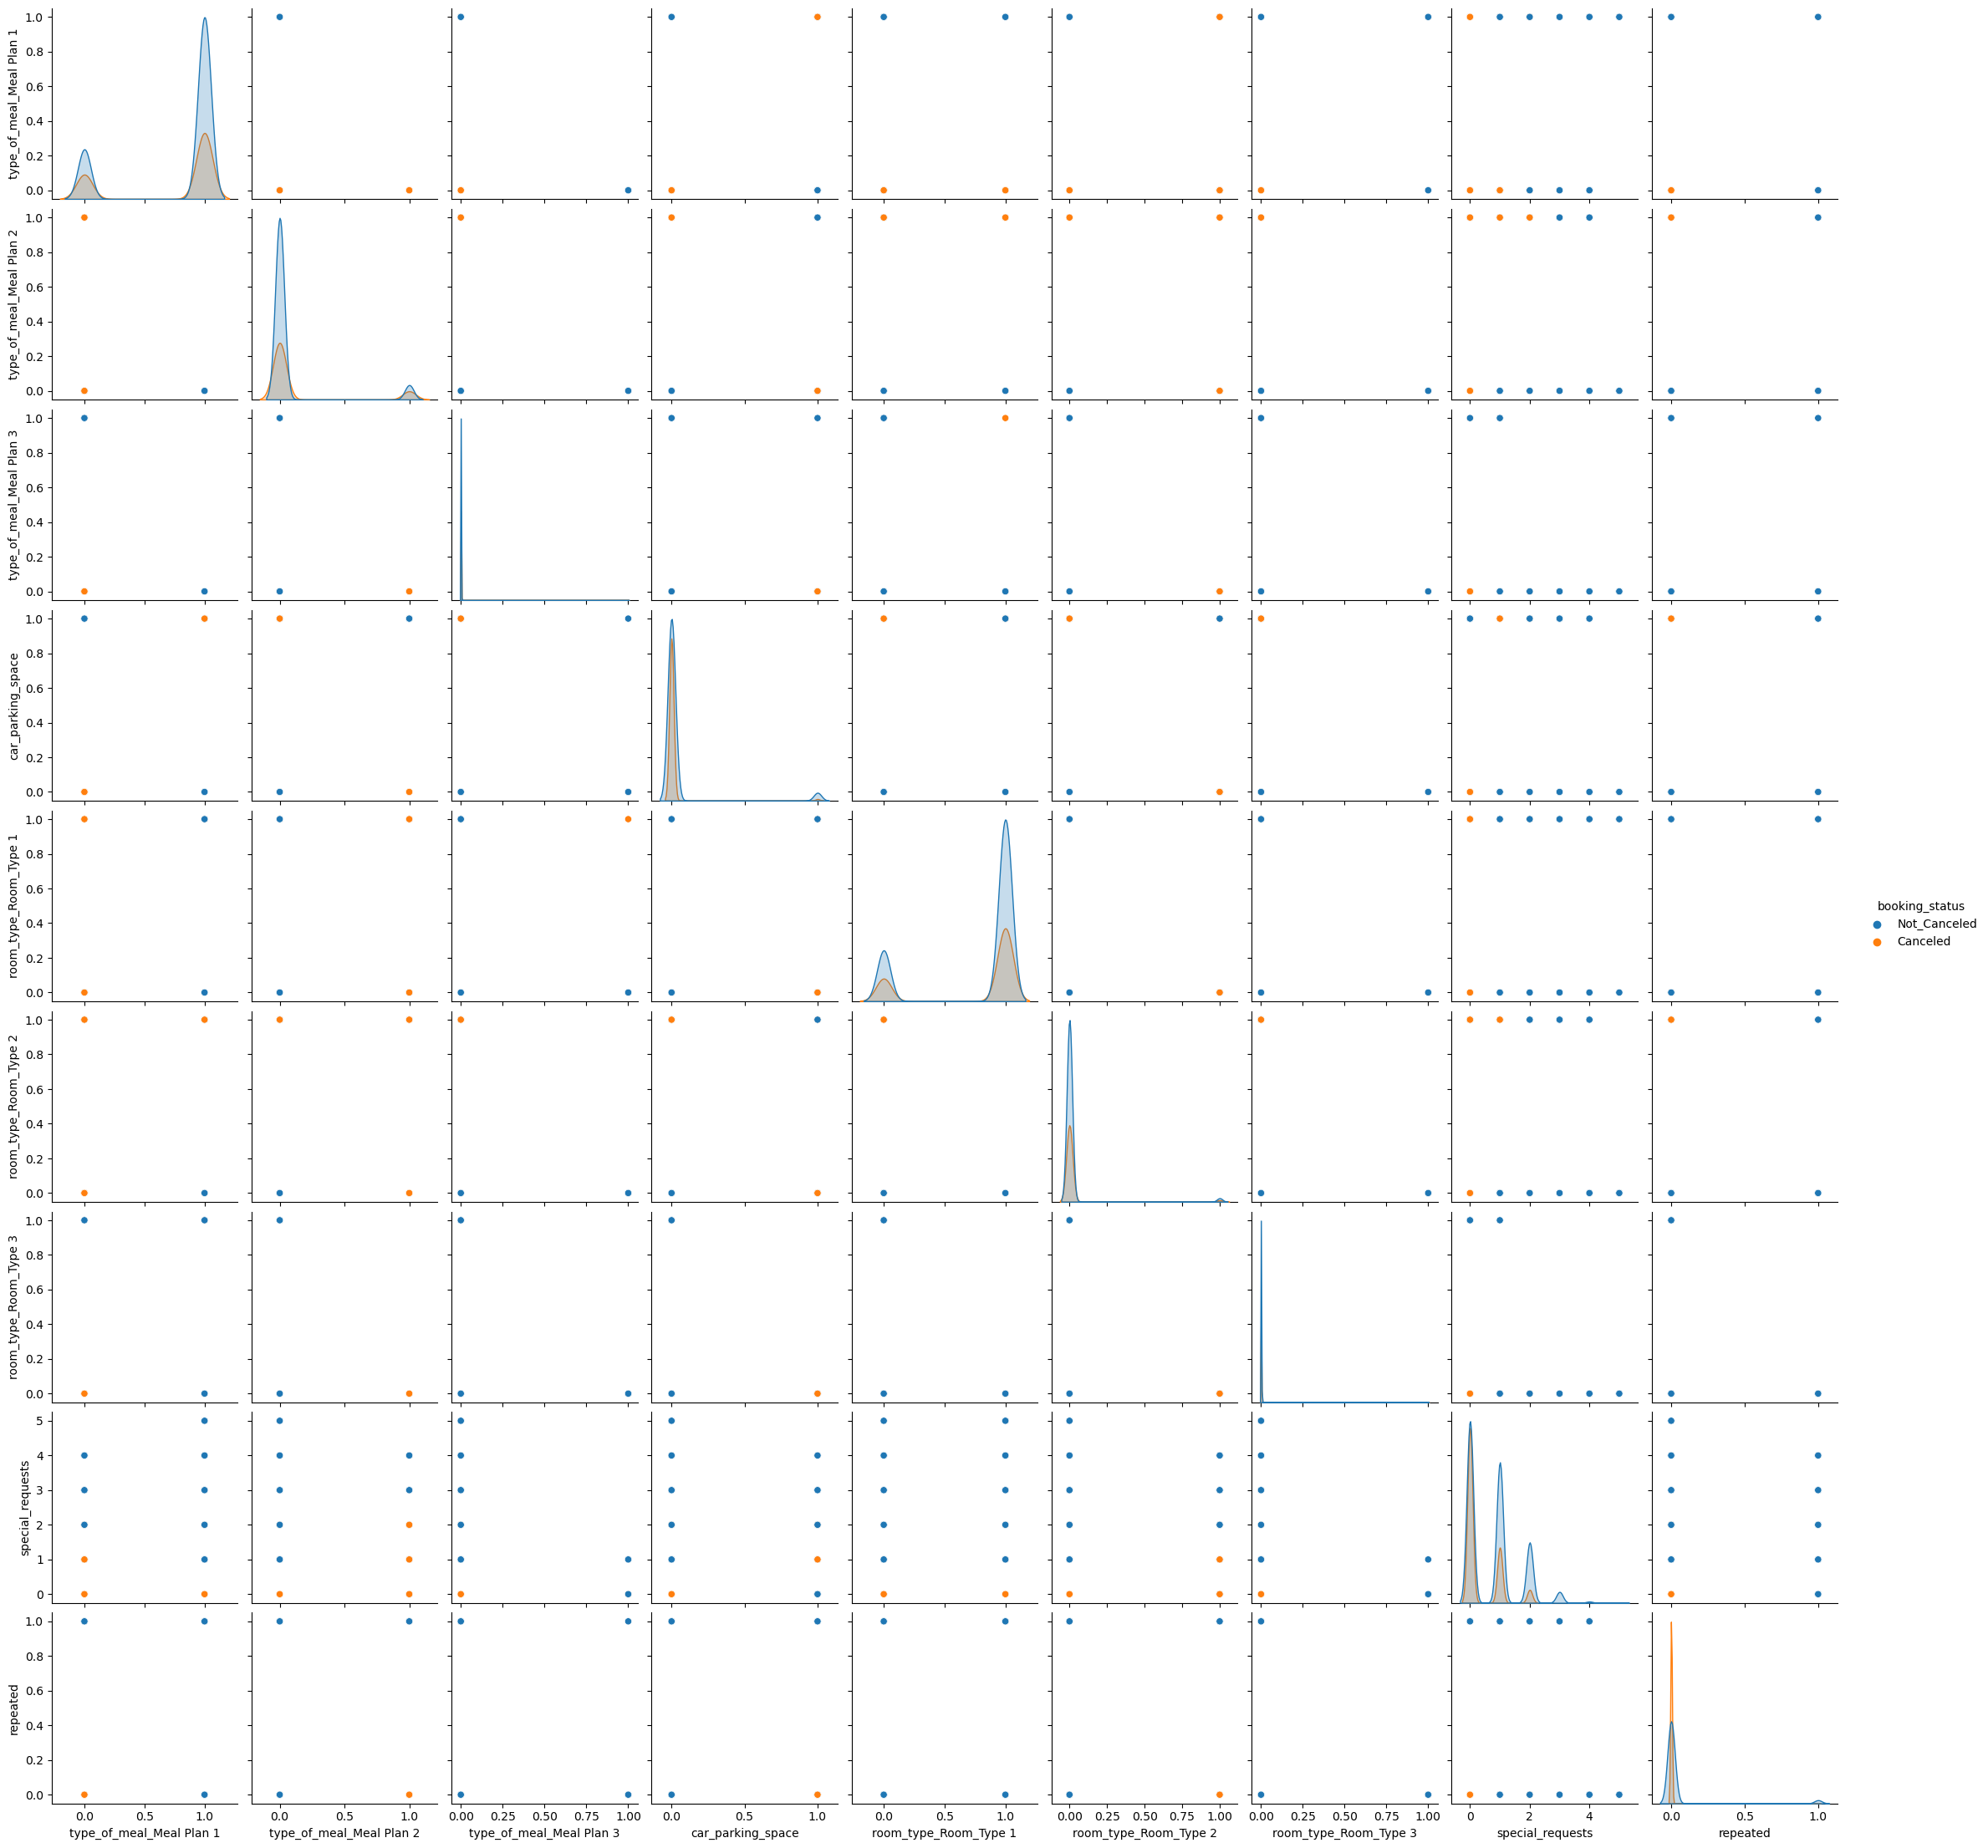

In [26]:
# Example: Pairplot for selected variables
sns.pairplot(selected_df, hue='booking_status', diag_kind='kde')
plt.savefig('tftttttt.png')
plt.show()


C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prior_special_requests]


Sampling 4 chains for 10 tune and 10 draw iterations (40 + 40 draws total) took 57 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


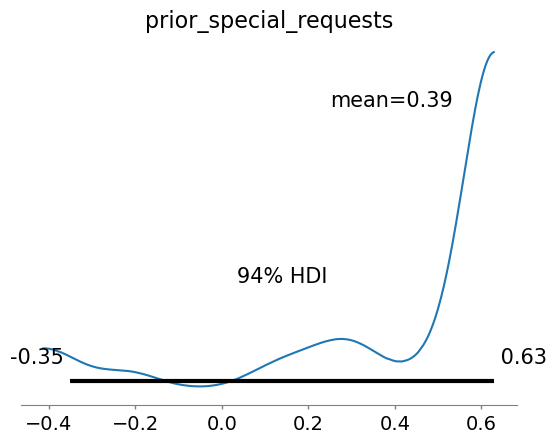

In [27]:
# Example: Bayesian analysis for special requests
with pm.Model() as model:
    # Define prior
    prior_special_requests = pm.Normal('prior_special_requests', mu=0, sd=1)
    
    # Define likelihood
    likelihood = pm.Normal('likelihood', mu=prior_special_requests, sd=1, observed=selected_df['special_requests'])
    
    # Sample from the posterior
    trace = pm.sample(10, tune=10)

# Plot the posterior distribution
pm.plot_posterior(trace)
plt.show()
